In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn

/home/ram/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ram/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ram/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ram/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ram/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [5]:
from sklearn.model_selection import train_test_split

/home/ram/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
data = pd.read_csv('Sstd.csv')

In [7]:
#print(data)

In [8]:
print(data.shape)

(1000, 33)


In [9]:
data.head()

,F,S11,S21,S31,S41,S12,S22,S32,S42,S13,...,S32',S42',S13',S23',S33',S43',S14',S24',S34',S44'
0,0.02,-58.881676,-0.010115,-77.568467,-77.850699,-0.010115,-58.881692,-77.850687,-77.570671,-77.568459,...,-77.850687,-77.570671,-77.568459,-77.850649,-58.881672,-0.010115,-77.850704,-77.570675,-0.010115,-58.881708
1,0.04,-58.865518,-0.010116,-77.188129,-77.749718,-0.010116,-58.865547,-77.749705,-77.190120,-77.188122,...,-77.749705,-77.190120,-77.188122,-77.749669,-58.865512,-0.010116,-77.749722,-77.190123,-0.010116,-58.865564
2,0.06,-58.838719,-0.010117,-76.620029,-77.586465,-0.010117,-58.838771,-77.586453,-76.621735,-76.620023,...,-77.586453,-76.621735,-76.620023,-77.586417,-58.838715,-0.010117,-77.586469,-76.621737,-0.010117,-58.838788
3,0.08,-58.801478,-0.010119,-75.932013,-77.367758,-0.010119,-58.801562,-77.367747,-75.933418,-75.932009,...,-77.367747,-75.933418,-75.932009,-77.367713,-58.801473,-0.010119,-77.367761,-75.933421,-0.010119,-58.801578
4,0.10,-58.754063,-0.010121,-75.182502,-77.101840,-0.010121,-58.754187,-77.101829,-75.183629,-75.182497,...,-77.101829,-75.183629,-75.182497,-77.101797,-58.754059,-0.010121,-77.101842,-75.183632,-0.010121,-58.754203


In [10]:
data.describe()

,F,S11,S21,S31,S41,S12,S22,S32,S42,S13,...,S32',S42',S13',S23',S33',S43',S14',S24',S34',S44'
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.010000,-37.534370,-0.035071,-41.577252,-47.917512,-0.035070,-37.543586,-47.917506,-41.576187,-41.577252,...,-47.917506,-41.576187,-41.577252,-47.917513,-37.534371,-0.035071,-47.917506,-41.576187,-0.035071,-37.543587
std,5.776389,6.747273,0.014967,8.161376,7.796602,0.014966,6.743587,7.796604,8.161927,8.161375,...,7.796604,8.161927,8.161375,7.796599,6.747273,0.014967,7.796606,8.161927,0.014966,6.743588
min,0.020000,-58.881676,-0.061683,-77.568467,-77.850699,-0.061680,-58.881692,-77.850687,-77.570671,-77.568459,...,-77.850687,-77.570671,-77.568459,-77.850649,-58.881672,-0.061683,-77.850704,-77.570675,-0.061680,-58.881708
25%,5.015000,-40.468143,-0.045387,-44.863291,-51.146805,-0.045385,-40.474079,-51.146801,-44.862756,-44.863291,...,-51.146801,-44.862756,-44.863291,-51.146805,-40.468144,-0.045387,-51.146801,-44.862756,-0.045385,-40.474080
50%,10.010000,-35.554766,-0.037063,-39.059490,-45.528233,-0.037062,-35.564686,-45.528230,-39.058463,-39.059490,...,-45.528230,-39.058463,-39.059490,-45.528234,-35.554767,-0.037063,-45.528229,-39.058463,-0.037062,-35.564686
75%,15.005000,-32.370805,-0.022522,-35.608477,-42.127472,-0.022522,-32.382732,-42.127464,-35.606906,-35.608477,...,-42.127464,-35.606906,-35.608477,-42.127474,-32.370806,-0.022522,-42.127462,-35.606906,-0.022522,-32.382733
max,20.000000,-30.277305,-0.010115,-33.201657,-39.787335,-0.010115,-30.293492,-39.787317,-33.199442,-33.201659,...,-39.787317,-33.199442,-33.201659,-39.787337,-30.277305,-0.010115,-39.787316,-33.199444,-0.010115,-30.293495


In [11]:
X = data[['F','S11','S21', 'S31', 'S41', 'S12', 'S22', 'S32', 'S42', 'S13', 'S23', 'S33', 'S43', 'S14', 'S24', 'S34', 'S44']]
Y = data[["S11'", "S21'", "S31'", "S41'", "S12'", "S22'", "S32'", "S42'", "S13'", "S23'", "S33'", "S43'", "S14'", "S24'", "S34'", "S44'"]]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [13]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(700, 17) (700, 16)
(300, 17) (300, 16)


In [45]:
model = Sequential()
model.add(Dense(32, input_shape=(17,), activation = 'relu'))
model.add(Dense(28, activation = 'relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(16, activation = 'softmax'))

In [46]:
print(model.summary())
plot_model(model, to_file='Sstd.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 32)                576       
_________________________________________________________________
dense_27 (Dense)             (None, 28)                924       
_________________________________________________________________
dense_28 (Dense)             (None, 24)                696       
_________________________________________________________________
dense_29 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_30 (Dense)             (None, 16)                336       
Total params: 3,032
Trainable params: 3,032
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [49]:
model.fit(X_train, Y_train, epochs=10, batch_size=10, validation_split = 0.3)

Train on 489 samples, validate on 211 samples
Epoch 1/10
489/489 [==============================] - 0s 826us/step - loss: 1419.3732 - acc: 0.8282 - val_loss: 1366.9584 - val_acc: 0.8483
Epoch 2/10
489/489 [==============================] - 0s 859us/step - loss: 1419.3732 - acc: 0.8282 - val_loss: 1366.9584 - val_acc: 0.8483
Epoch 3/10
489/489 [==============================] - 0s 799us/step - loss: 1419.3733 - acc: 0.8282 - val_loss: 1366.9584 - val_acc: 0.8483
Epoch 4/10
489/489 [==============================] - 0s 836us/step - loss: 1419.3732 - acc: 0.8282 - val_loss: 1366.9584 - val_acc: 0.8483
Epoch 5/10
489/489 [==============================] - 0s 809us/step - loss: 1419.3732 - acc: 0.8282 - val_loss: 1366.9584 - val_acc: 0.8483
Epoch 6/10
489/489 [==============================] - 0s 836us/step - loss: 1419.3732 - acc: 0.8282 - val_loss: 1366.9584 - val_acc: 0.8483
Epoch 7/10
489/489 [==============================] - 0s 834us/step - loss: 1419.3732 - acc: 0.8282 - val_loss: 13

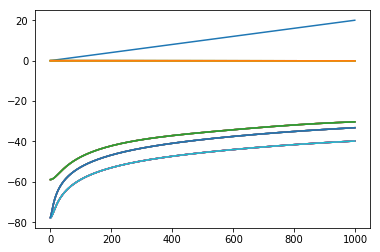

In [111]:
plt.plot(data)

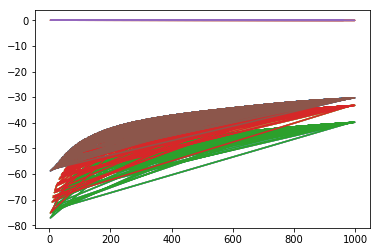

In [110]:
plt.plot(Y_test)

In [74]:
#data_matrix = pd.DataFrame.as_matrix(data)

In [186]:
#print(data_matrix.shape)

In [48]:
#s = int(0.7*data.shape[0])

#X_train = data_matrix[0:s,0:data_matrix.shape[1]-16]
#X_test = data_matrix[s:data_matrix.shape[0],0:data_matrix.shape[1]-16]

#y_train = data_matrix[0:s,data_matrix.shape[1]-16]
#y_test = data_matrix[s:data_matrix.shape[0],data_matrix.shape[1]-16]

In [185]:
#print(X_train.shape, Y_train.shape)
#print(X_test.shape, Y_test.shape)